# Project C118

## Getting Data

In [2]:
import pandas
import plotly.express as px

print("Getting Data from CSV...")
data_frame = pandas.read_csv("https://raw.githubusercontent.com/whitehatjr/datasets/master/C118/stars.csv")
size = data_frame["Size"].to_list()
light = data_frame["Light"].to_list()
print("Done Getting Data from CSV!")

print("\nHere is the Data: ")
print(data_frame.head())

Getting Data from CSV...
Done Getting Data from CSV!

Here is the Data: 
        Size     Light
0   5.882677  1.325411
1  10.912830  3.183217
2   0.281190  0.620011
3   7.682623  1.804578
4  11.034071  3.390440


## Shwoing Data

In [14]:
data_chart = px.scatter(x=size, y=light, color=light, labels=dict(x="Size of Stars", y="Light Level", color="Light Level"), title="Size of Star vs Light the Star gives off")
data_chart.show()

## Getting WCSS

In [12]:
from sklearn.cluster import KMeans

x = data_frame.iloc[:, [0, 1]].values

print("Getting WCSS...")
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    k_means.fit(x)

    wcss.append(k_means.inertia_)

print("Done getting WCSS!")

Getting WCSS...
Done getting WCSS!


## The Elbow Method

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



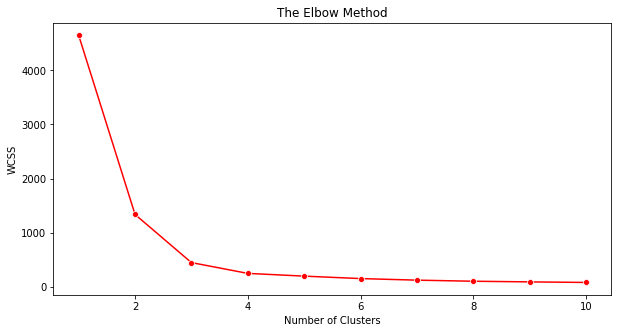

In [13]:
import matplotlib.pyplot as plt
import seaborn

plt.figure(figsize=(10,5))
seaborn.lineplot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Getting Y KMeans

In [17]:
k_means = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = k_means.fit_predict(x)

## Showing Cluster of Stars after KMeans

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

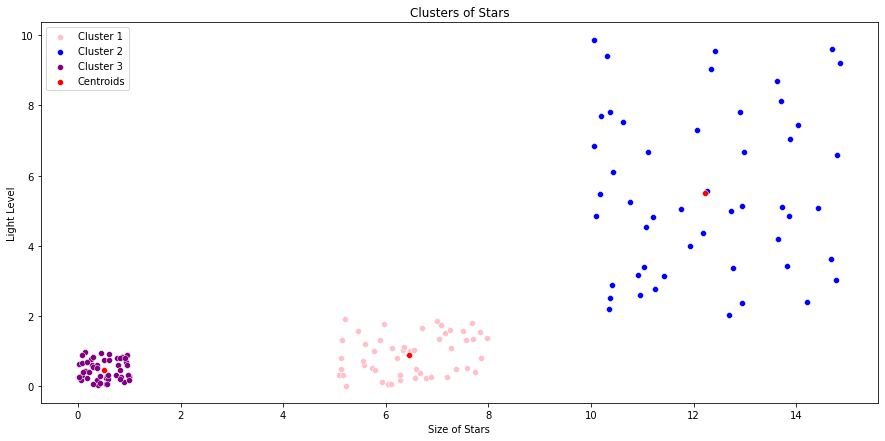

In [19]:
plt.figure(figsize=(15,7))
seaborn.scatterplot(x[y_kmeans==0, 0], x[y_kmeans==0, 1], color='pink', label='Cluster 1')
seaborn.scatterplot(x[y_kmeans==1, 0], x[y_kmeans==1, 1], color='blue', label='Cluster 2')
seaborn.scatterplot(x[y_kmeans==2, 0], x[y_kmeans ==2, 1], color='purple', label='Cluster 3')
seaborn.scatterplot(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], color='red', label='Centroids')
plt.grid(False)
plt.title('Clusters of Stars')
plt.xlabel('Size of Stars')
plt.ylabel('Light Level')
plt.legend()
plt.show()